# Lecture 19 - Symbolic Calculus with SymPy

## Overview, Objectives, and Key Terms
 
Symbolic computing using SymPy was introduced in [Lecture 18](ME400_Lecture_18.ipynb).  The basics of symbols, symbolic expressions, and solving symbolic equations were introduced.  In this lesson, additional features of SymPy related to calculus will be demonstrated.
 
### Objectives

By the end of this lesson, you should be able to

- Evaluate limits using SymPy
- Evaluate derivatives using SymPy
- Evaluate integrals using SymPy

### Key Terms

- `sympy.limit`
- `sympy.diff`
- `sympy.Derivative`
- `sympy.integrate`
- `sympy.Integral`

## In the Beginning There Were Limits

An understanding of calculus usually starts with the concept of *limit*.  In fact, the classical definition for the derivative of a function $f(x)$ is 

$$
  \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} \, .
$$

SymPy can handle limits, so let's see if we use limits to  find the derivative of :math:`f(x) = ax^2 + bx + c`.  First, remember to do the necessary import and initialization, and  get  symbols ready:

In [1]:
import sympy as sp
sp.init_printing()
a, b, c, x, h = sp.symbols('a b c x h')

Then, define the function and use substitution to define it at the perturbed value $x+h$:


In [2]:
f = a*x**2 + b*x + c
f_plus = f.subs({x:x+h})

Evaluation of the limit is easy:

In [3]:
f_prime = sp.limit((f_plus-f)/h, h, 0)
f_prime

The result $2ax+b$ is precisely what one should expect.  If we want the symbolic representation of the limit, we need only use `Limit` instead of `limit`, e.g.,

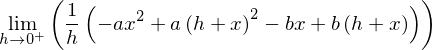

In [4]:
sp.Limit((f_plus-f)/h, h, 0)

which can be then be evaluated via 

In [5]:
sp.Limit((f_plus-f)/h, h, 0).doit()

Note the "+" in the limit above: by default, SymPy evaluates the the right-hand limit, i.e., as $h$ approaches zero from  the right.  Alternative, we could evaluate the left-hand limit with

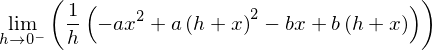

In [6]:
sp.Limit((f_plus-f)/h, h, 0, '-')

When the right-hand and left-hand limits of $f(x)$ agree as $x$ approaches some value $x_0$, a two-sided limit is said to exist.  A simple examples illustrates that such a limit does not always exist:

In [7]:
sp.limit(1/x, x, 0, '+'), sp.limit(1/x, x, 0, '-')

## Derivatives

Thankfully, we don't need to use limits everytime we want to  differentiate a function with SymPy:

In [8]:
sp.diff(f, x)

Higher-order derivatives are also easily computed:

In [9]:
 sp.diff(f, x, 2)

In [10]:
 sp.diff(f, x, 3)

If a function `g(x)` is not given an explicit form, SymPy leaves its derivatives in symbolic form:

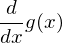

In [11]:
g = sp.Symbol('g')
sp.diff(g(x), x)

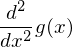

In [12]:
sp.diff(g(x), x, 2)

As for limits, we can define a derivative without its evaluation, e.g.,

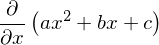

In [13]:
sp.Derivative(f, x)

Here, note the *partial* derivative symbols $\partial$.  Because $a$, $b$, and $c$ are symbols, SymPy cannot know that we intend $f$ to be a function only of $x$ and that the coeffiecients are themselves not functions of $x$.  


### Partial Derivatives

So what *is* a partial derivative?  Let $f(x, y)$ be some arbitrary function of the two variables $x$ and $y$.  We define the *partial derivative* of $f$ with respect to $x$ as

$$
 \frac{\partial f}{\partial x} = \lim_{h\to 0} \frac{ f(x+h,y)-f(x) }{h}
$$

which is sometimes written compactly as $f_x$.  A similar expression exists for $f_y$.  Based on the formal limit definition, partial  derivatives are no different from *ordinary* derivatives if we imagine the other variables (here, $y$) as constants. 

SymPy can evaluate such partial derivatives:

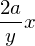

In [14]:
y = sp.symbols('y')
f = a*x**2/y
pf_px = sp.Derivative(a*x**2/y, x)
pf_px.doit()

### Implicit Differentiation

Consider the equation

$$
  5\sin(x) + 3\sec(y) = y - x^2 + 3
$$

How do we find $dy/dx$?  It is not possible to solve directly for $y$ in terms of $x$ or vice-versa.  Therefore, *implicit differentiation* is needed.  The trick is to differentiate both sides with  respect to $x$ and solve for $dy/dx$.  Here it all is with a bit of help from SymPy, where we first define $y$ as an explicit function of $x$:

In [15]:
y = sp.Symbol('y')

Then we represent the equation by a single expression and differentiate:

In [16]:
expr = 5*sp.sin(x) + 3*sp.sec(y(x)) - y(x) + x**2 - 3
expr

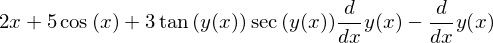

In [17]:
d_expr = sp.diff(expr, x)
d_expr

To find $dy/dx$ is as easy as doing

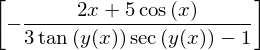

In [18]:
sp.solve(d_expr, sp.diff(y(x), x))

Pretty slick!

Notice, to represent the (mathematical) function $y(x)$, all that is needed is a symbol $y$.  Then `y(x)` is treated like a function, and its derivative with respect to `x` is

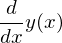

In [19]:
sp.diff(y(x), x)

However, always make sure to use `y(x)` when `y` is to be a function of `x`.  Typing `y` alone, which suggests `y` is a symbol all by itself, will lead to the following derivative:

In [20]:
sp.diff(y, x)

## And Then There Were More Limits

Once you got done with differentiation, life was good.  All sorts of problems could be solved by differential calculus.  But then you encountered antiderivatives and integrals.  For the specific case of  *definite* integrals, you may remember the following formal definition:

$$
  \int^b_a f(x) dx = 
     \lim_{n \to \infty} \sum^{n}_{i=1} f(i (b-a)/n + a) (b-a)/n
$$

Here, the sum is a *Riemann sum* (specifically a right-sided sum).  Integrals are areas under curves, and Riemann sums approximate those areas by  rectangles.

SymPy can represent sums symbolically.  For instance, the Riemann sum above can be defined for $f(x) = x^2$ as

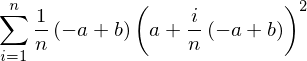

In [21]:
x, i, n, a, b, = sp.symbols('x i n a b')
f = x**2
sp.Sum(((b-a)/n) * f.subs({x:i*(b-a)/n+a}), (i, 1, n))

For the specific case of $f(x) = x^2$, $a=0$, and $b=1$, we have

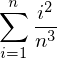

In [22]:
S = sp.Sum(((b-a)/n) * f.subs({x:i*(b-a)/n+a}), (i, 1, n)).subs({a:0, b:1})  
S

In [23]:
for m in [10, 100, 1000, 10000, 100000]:
    print(S.subs({n:m}).evalf())

0.385000000000000
0.338350000000000
0.333833500000000
0.333383335000000
0.333338333350000


Of course, the greater the number of little rectangles, the closer to $\int^1_0 x^2 dx = 1/3$ we get.  Can we take $n=\infty$?  Note, `sp.oo` represents $\infty$ in SymPy.  Let's try

In [24]:
S.subs({n:sp.oo}).evalf() 

Well, that does not work.  How about using a limit?

In [25]:
sp.limit(S, n, sp.oo)

That is the right result.

## Symbolic Integration

Just as SymPy can differentiate expressions, it can integrate them.  For 
indefinite integrals, the syntax is

In [26]:
f = x**2
sp.integrate(f, x)

To add bounds and make the integral definite, the syntax becomes

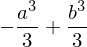

In [27]:
sp.integrate(f, (x, a, b))

Now, consider the following, rather benign looking integral:

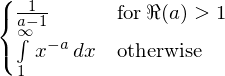

In [28]:
sp.integrate(1/x**a, (x, 1, sp.oo))

SymPy provides two outputs because in one case ($\Re(a) > a$, i.e., the real part of $a$ must be greater than unity),  the integral exists, while in the second, the integral is left in the symbolic form because it cannot be evaluated. 

The whole business of being real or imaginary takes us a bit out of our scope, but we're  not really interested in complex numbers here.  Can we avoid the issue and simply tell SymPy that $a$ should be a real number?  Yes.  One way is simply to  define $a$ to be real from the start:

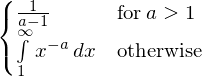

In [29]:
a = sp.Symbol('a', real=True)
sp.integrate(1/x**a, (x, 1, sp.oo))

The result is basically the same (evaluated only for $a>1$), but it no longer has $\Re(a)$.

One can also define but not evaluate an integral (just as was shown above for derivatives).  For example, consider

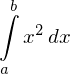

In [30]:
I = sp.Integral(f, (x, a, b))
I

This integral can be formally evaluated using `doit`, or

In [31]:
I.subs({a:0, b:1}).doit()

and numerically evaluated using `evalf`, or

In [32]:
I.subs({a:0, b:1}).evalf()

## Further Reading

None at this time.  That said, this lesson is but a taste of *how* SymPy can be used for calculus.  Much more value will come by *practicing* with the tools presented, and one way to do that would be to revisit problems from past calculus courses.  Some possible topics to explore may include evaluating limits (with tools like l'Hopital's rule), the various differentiation rules (chain, product, etc., all of which can be demonstrated symbolically), and multidimensional integrals.